In [1]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes

import matplotlib.pyplot as plt
import pandas as pd

import config_syntheic as config

In [2]:
def load_csv_data(path: str) -> pd.core.frame.DataFrame:
    """Load CSV dataset as dataframe"""
    return pd.read_csv(path, delimiter=',')

In [3]:
def plot_syntheic_load(true_values: any, predicted_values: any) -> None:
    plt.figure(figsize=(10, 6))
    plt.plot(true_values, label='True Values')

    for i in range(config.nTrial):
        plt.plot(predicted_values.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('sin(t)')
    plt.title('Syntheic Data Prediction (sin_wave_nonoise)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [4]:
def plot_syntheic_load_by_mean_max_min(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)

    # sampling time points
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    sampled_mean_values = mean_values[sampled_time_points]

    max_values = predicted_values.max(axis=1)
    min_values = predicted_values.min(axis=1)

    sampled_max_values = max_values[sampled_time_points]
    sampled_min_values = min_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', linestyle='-', color='blue', label='Mean')
    plt.plot(sampled_time_points, sampled_max_values, marker='_', linestyle='', color='red', label='Max')
    plt.plot(sampled_time_points, sampled_min_values, marker='_', linestyle='', color='green', label='Min')
    plt.plot(true_values, color='black', label='True Values')

    for t in sampled_time_points:
        plt.plot([t, t], [sampled_min_values[t], sampled_max_values[t]], linestyle='-', color='gray')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()


In [5]:
def plot_syntheic_load_by_mean_std(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    std_values = predicted_values.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Prediction')
    plt.errorbar(sampled_time_points, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)
    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [6]:
def plot_syntheic_load_list_by_mean_std(true_values: any, predicted_values_list: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    for index in range(len(sampled_mean_values_list)):
        plt.plot(sampled_time_points, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)

    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [7]:
def plot_prediction_absolute_error(error_abs_value: any) -> None:
    plt.figure(figsize=(10, 6))

    x_values = [i for i in range(config.start, config.end+1)]

    for i in range(config.nTrial):
        plt.plot(x_values, error_abs_value.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [8]:
def plot_prediction_absolute_error_by_mean_std(error_abs_value: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    # TODO: fix this error epoch start and end
    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = error_abs_value.mean(axis=1)
    std_values = error_abs_value.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    # TODO: fix this error epoch start and end
    plt.plot(sampled_x_values, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Error')
    # TODO: fix this error epoch start and end
    plt.errorbar(sampled_x_values, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()
    

In [9]:
def plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list: any, sampling_interval: int, zoom_coords: tuple) -> None:
    fig, ax = plt.subplots(figsize=(10, 6))

    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_error_abs_value in error_abs_value_list:
        mean_values = case_error_abs_value.mean(axis=1)
        std_values = case_error_abs_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])

    for index in range(len(sampled_mean_values_list)):
        color = config.color_dict.get(index % len(config.color_dict))
        ax.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        ax.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)

    ax.set_xlabel('Time Step t')
    ax.set_ylabel('Prediction error')
    ax.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    
    zoom_coords_x = zoom_coords[0]
    zoom_coords_y = zoom_coords[1]

    # The `inset_axes`` function is used to create an inset axes, allowing you to create a zoomed-in plot within a larger plot.
    # It can be used to specify the position and size of the inset axes.
    # The `bbox_to_anchor`` parameter is used to specify the relative position of the inset axes within the parent axes.
    ax_zoom = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(1.08, 0.2, 0.5, 0.5), bbox_transform=ax.transAxes)
    
    for index in range(len(sampled_mean_values_list)):
        color = config.color_dict.get(index % len(config.color_dict))
        ax_zoom.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case 1')
        ax_zoom.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)
    
    ax_zoom.axhline(y=min(sampled_mean_values_list[0]), color='gray', linestyle='--')
    ax_zoom.set_xlim(*zoom_coords_x) 
    ax_zoom.set_ylim(*zoom_coords_y)
    mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
    
    plt.show()

## Case1

In [10]:
df = load_csv_data(config.predict_results_path)
df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,NaN
1,2,0.531445,NaN,0.530,0.530,0.530,0.530,0.530,0.530,0.530,0.530,0.530,0.530,NaN
2,3,0.562767,NaN,0.565,0.565,0.565,0.565,0.565,0.565,0.565,0.565,0.565,0.565,NaN
3,4,0.593841,NaN,0.595,0.595,0.595,0.595,0.595,0.595,0.595,0.595,0.595,0.595,NaN
4,5,0.624545,NaN,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,NaN


In [11]:
df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
39996,19996,NaN,NaN,5.460000e-03,0.00046,0.00546,0.00046,0.00046,4.600000e-04,0.00546,0.00204,0.00046,0.00546,NaN
39997,19997,NaN,NaN,1.160000e-03,0.00116,0.00616,0.00116,0.00116,1.340000e-03,0.00384,0.00884,0.00134,0.01116,NaN
39998,19998,NaN,NaN,2.230000e-03,0.00027,0.00277,0.00223,0.00277,2.770000e-03,0.00277,0.00277,0.00277,0.01473,NaN
39999,19999,NaN,NaN,3.550000e-03,0.00355,0.00145,0.00355,0.00145,3.550000e-03,0.00145,0.00105,0.00355,0.00355,NaN
40000,20000,NaN,NaN,2.220450e-16,0.00250,0.00500,0.00500,0.00500,2.220450e-16,0.00500,0.00500,0.00500,0.00500,NaN


In [12]:
# true values need to be shifted by 1
true_values = df["TRUE"][config.start+1:config.end+1+1]
true_values

19901    1.52645
19902    1.55777
19903    1.58884
19904    1.61954
19905    1.64976
          ...   
19997    1.40616
19998    1.43723
19999    1.46855
20000    1.50000
20001        NaN
Name: TRUE, Length: 101, dtype: float64

In [13]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
predicted_values = df[predicted_column][config.start:config.end+1]
predicted_values

,1,2,3,4,5,6,7,8,9,10
19900,1.5250,1.5250,1.530,1.5200,1.530,1.5250,1.525,1.5300,1.5200,1.5300
19901,1.5550,1.5600,1.560,1.5500,1.555,1.5600,1.555,1.5600,1.5550,1.5600
19902,1.5750,1.5875,1.590,1.5750,1.590,1.5900,1.595,1.5950,1.5825,1.5950
19903,1.6175,1.6150,1.615,1.6150,1.615,1.6200,1.620,1.6200,1.6150,1.6200
19904,1.6500,1.6450,1.650,1.6425,1.645,1.6450,1.650,1.6500,1.6450,1.6550
...,...,...,...,...,...,...,...,...,...,...
19996,1.4050,1.4050,1.400,1.4050,1.405,1.4075,1.410,1.4150,1.4075,1.3950
19997,1.4350,1.4375,1.440,1.4350,1.440,1.4400,1.440,1.4400,1.4400,1.4225
19998,1.4650,1.4650,1.470,1.4650,1.470,1.4650,1.470,1.4675,1.4650,1.4650
19999,1.5000,1.5025,1.505,1.5050,1.505,1.5000,1.505,1.5050,1.4950,1.5050


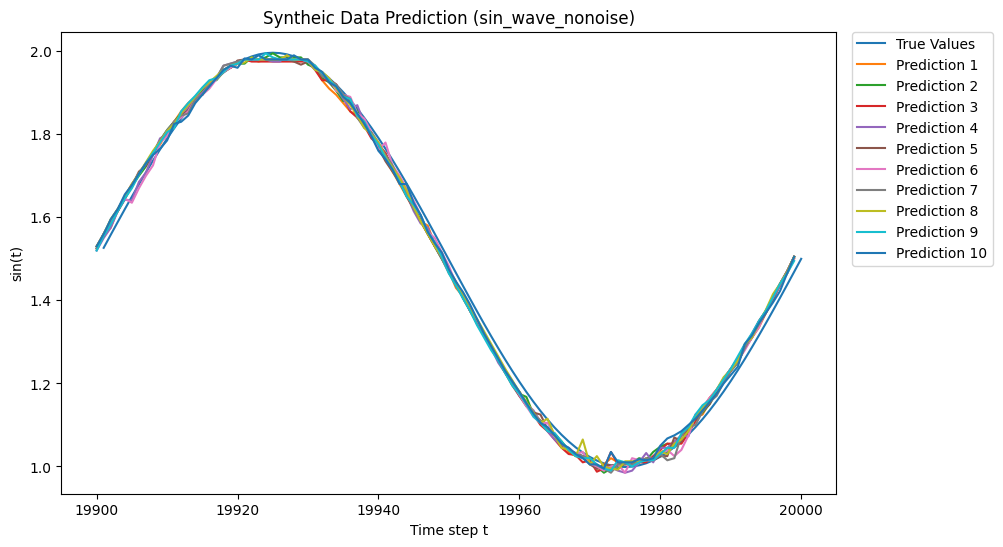

In [14]:
plot_syntheic_load(true_values, predicted_values)

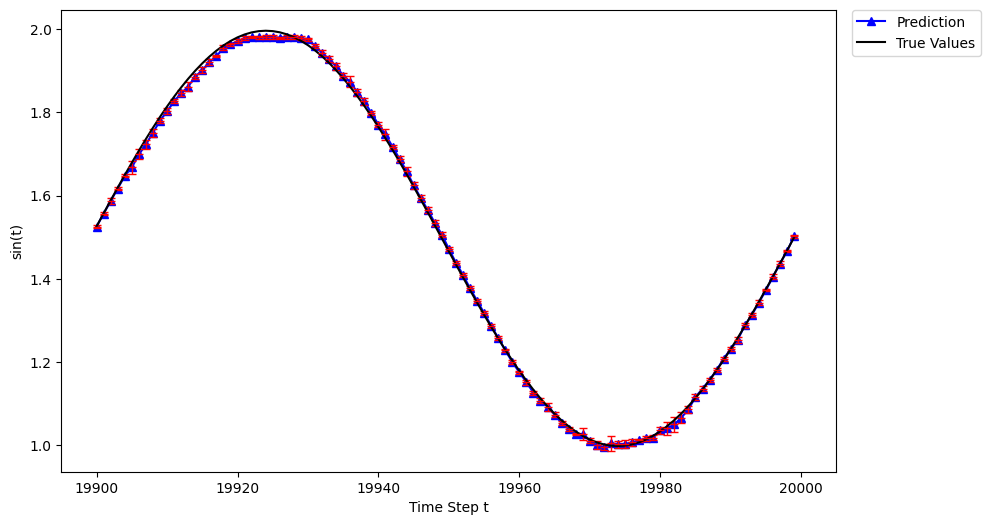

In [15]:
plot_syntheic_load_by_mean_std(true_values, predicted_values, sampling_interval=config.sampling_interval)

In [16]:
# abs(outputdata[n][a] - inputdata[a+1])
error_abs_value = df[predicted_column][config.error_abs_start:config.error_abs_end+1]
error_abs_value

,1,2,3,4,5,6,7,8,9,10
39900,2.500000e-03,0.00000,0.00500,0.00500,0.00000,0.000000e+00,0.00000,0.00500,0.00250,0.00000
39901,1.450000e-03,0.00145,0.00355,0.00645,0.00355,1.450000e-03,0.00145,0.00355,0.00645,0.00355
39902,2.770000e-03,0.00223,0.00223,0.00777,0.00277,2.230000e-03,0.00277,0.00223,0.00277,0.00223
39903,1.384000e-02,0.00134,0.00116,0.01384,0.00116,1.160000e-03,0.00616,0.00616,0.00634,0.00616
39904,2.040000e-03,0.00454,0.00454,0.00454,0.00454,4.600000e-04,0.00046,0.00046,0.00454,0.00046
...,...,...,...,...,...,...,...,...,...,...
39996,5.460000e-03,0.00046,0.00546,0.00046,0.00046,4.600000e-04,0.00546,0.00204,0.00046,0.00546
39997,1.160000e-03,0.00116,0.00616,0.00116,0.00116,1.340000e-03,0.00384,0.00884,0.00134,0.01116
39998,2.230000e-03,0.00027,0.00277,0.00223,0.00277,2.770000e-03,0.00277,0.00277,0.00277,0.01473
39999,3.550000e-03,0.00355,0.00145,0.00355,0.00145,3.550000e-03,0.00145,0.00105,0.00355,0.00355


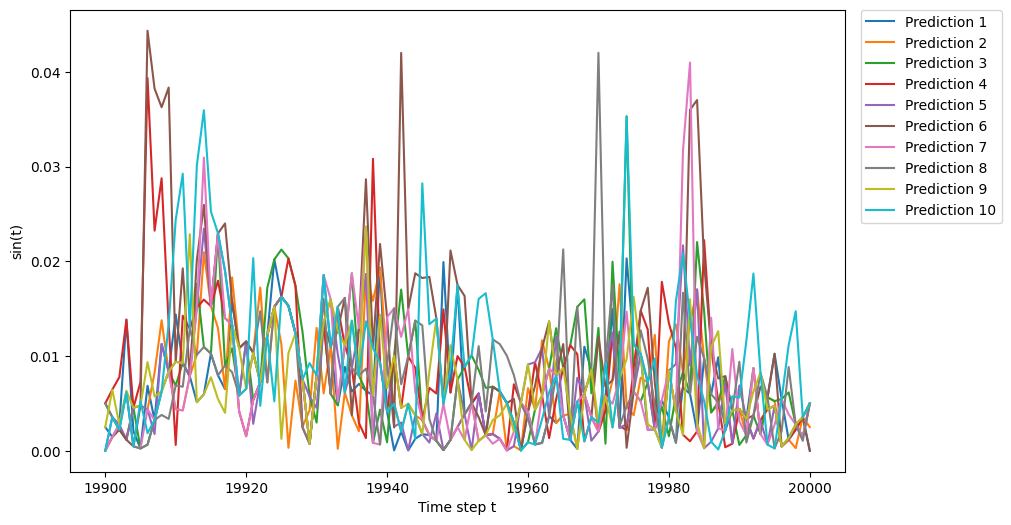

In [17]:
plot_prediction_absolute_error(error_abs_value)

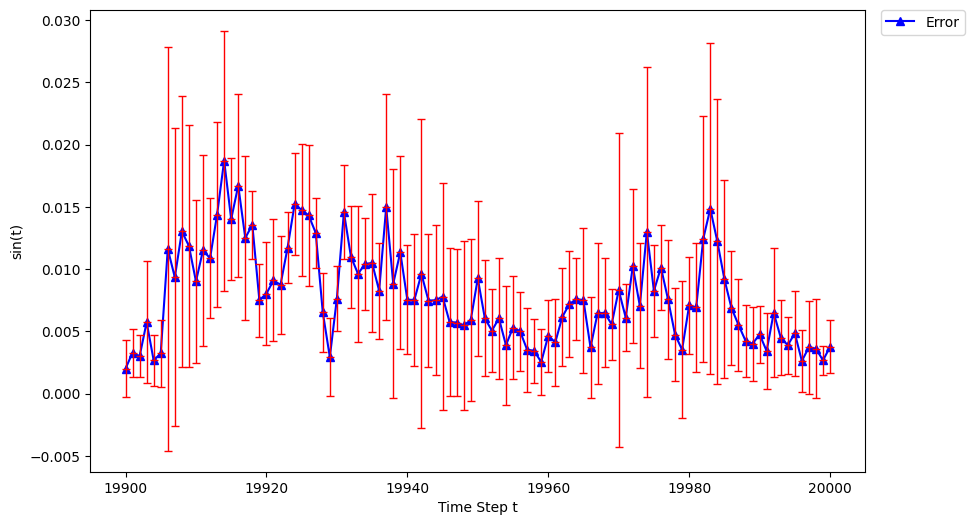

In [18]:
plot_prediction_absolute_error_by_mean_std(error_abs_value, sampling_interval=config.sampling_interval)

## proposed

In [19]:
df_proposed = load_csv_data(config.proposed_predict_results_path)
df_proposed.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,NaN
1,2,0.531445,NaN,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,NaN
2,3,0.562767,NaN,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,NaN
3,4,0.593841,NaN,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,NaN
4,5,0.624545,NaN,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,NaN


In [20]:
# true values need to be shifted by 1
true_values_proposed = df_proposed["TRUE"][config.start+1:config.end+1+1]
true_values_proposed

19901    1.52645
19902    1.55777
19903    1.58884
19904    1.61954
19905    1.64976
          ...   
19997    1.40616
19998    1.43723
19999    1.46855
20000    1.50000
20001        NaN
Name: TRUE, Length: 101, dtype: float64

In [21]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
predicted_values_proposed = df_proposed[predicted_column][config.start:config.end+1]
predicted_values_proposed

,1,2,3,4,5,6,7,8,9,10
19900,0.52250,1.52500,1.48125,1.52500,1.02500,0.52250,1.02500,0.52250,1.01875,0.52250
19901,1.05625,0.55500,1.05625,0.55500,1.05875,0.55500,1.55750,1.05625,1.54250,0.55500
19902,0.58750,0.58500,0.58500,0.58500,1.08875,0.58500,0.58500,0.58750,0.58500,0.58500
19903,0.61750,1.57500,0.61750,0.61750,1.11875,1.12375,1.62250,1.62250,0.61500,0.61750
19904,1.65250,1.13625,1.65000,0.64750,1.14625,0.65000,1.14875,1.15000,1.14625,1.65000
...,...,...,...,...,...,...,...,...,...,...
19996,1.40500,1.40750,1.40750,1.40500,1.40750,1.40625,1.40750,1.40750,0.40250,0.39875
19997,0.93625,0.43250,1.43500,0.43000,1.43500,0.43000,0.43500,0.43500,0.93375,0.43250
19998,1.46750,0.46500,1.46750,0.96625,1.46750,0.96625,1.47250,0.96750,0.96375,1.47000
19999,0.99875,0.99875,0.99125,1.49750,1.49750,0.99625,1.50500,1.50000,1.49500,1.00125


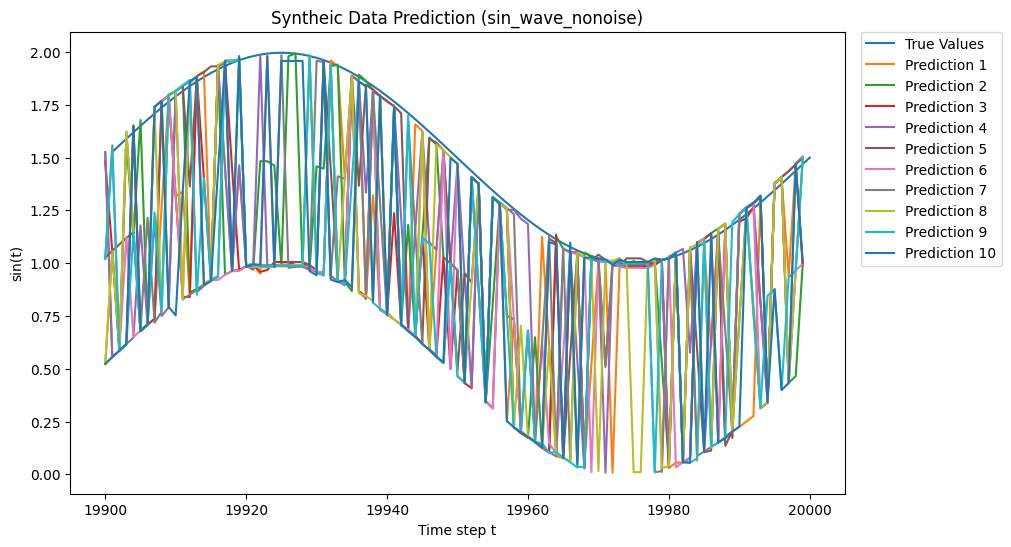

In [22]:
plot_syntheic_load(true_values_proposed, predicted_values_proposed)

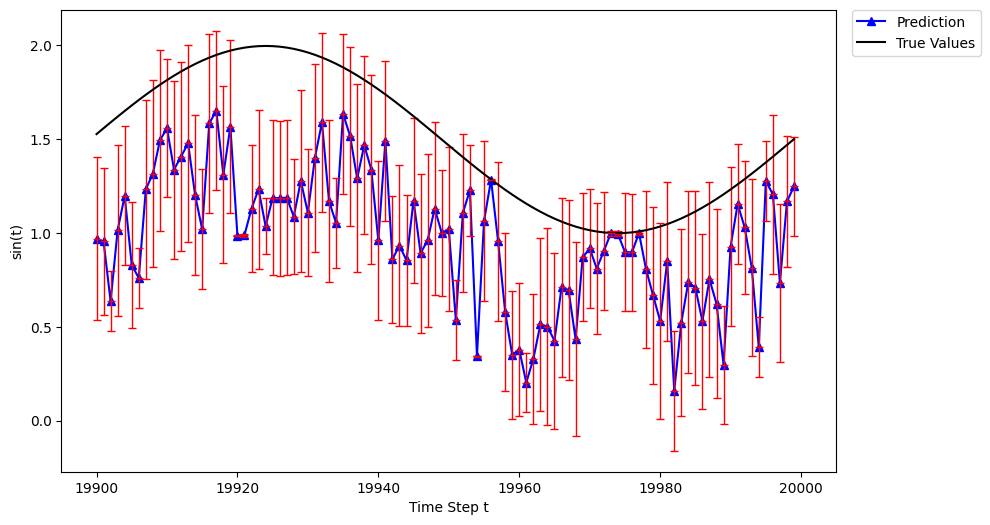

In [23]:
plot_syntheic_load_by_mean_std(true_values_proposed, predicted_values_proposed, sampling_interval=config.sampling_interval)

In [24]:
# abs(outputdata[n][a] - inputdata[a+1])
error_abs_value_proposed = df_proposed[predicted_column][config.error_abs_start:config.error_abs_end+1]
error_abs_value_proposed

,1,2,3,4,5,6,7,8,9,10
39900,0.50375,0.50375,0.00500,0.00000,0.00250,0.50500,0.00000,1.007500e+00,0.00250,0.00250
39901,1.00395,0.00145,0.04520,0.00145,0.50145,1.00395,0.50145,1.003950e+00,0.50770,1.00395
39902,0.50152,1.00277,0.50152,1.00277,0.49902,1.00277,0.00027,5.015200e-01,0.01527,1.00277
39903,1.00134,1.00384,1.00384,1.00384,0.50009,1.00384,1.00384,1.001340e+00,1.00384,1.00384
39904,1.00204,0.04454,1.00204,1.00204,0.50079,0.49579,0.00296,2.960000e-03,1.00454,1.00204
...,...,...,...,...,...,...,...,...,...,...
39996,0.00046,0.00046,0.00204,0.00046,0.00454,0.00204,0.00204,2.040000e-03,0.50171,0.49796
39997,0.00116,0.00134,0.00134,0.00116,0.00134,0.00009,0.00134,1.340000e-03,1.00366,1.00741
39998,0.50098,1.00473,0.00223,1.00723,0.00223,1.00723,1.00223,1.002230e+00,0.50348,1.00473
39999,0.00105,1.00355,0.00105,0.50230,0.00105,0.50230,0.00395,5.010500e-01,0.50480,0.00145


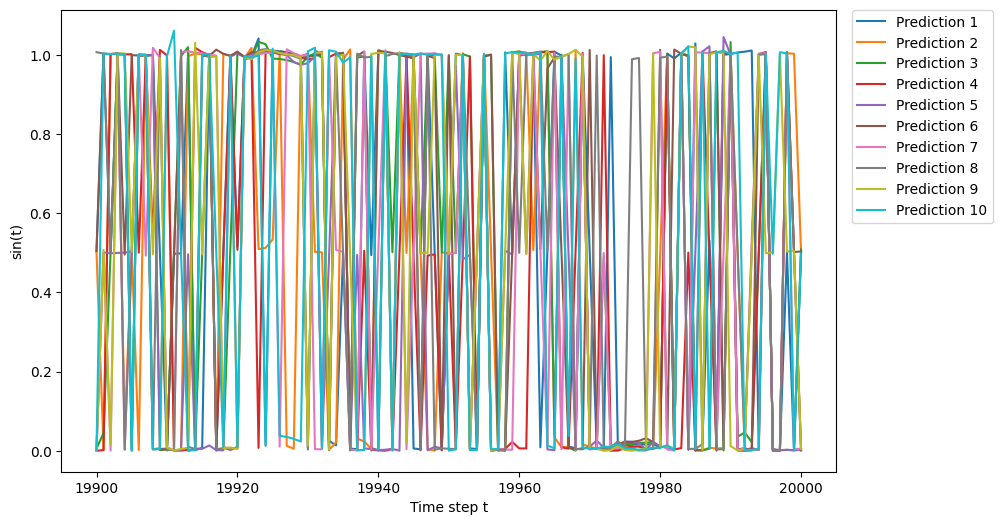

In [25]:
plot_prediction_absolute_error(error_abs_value_proposed)

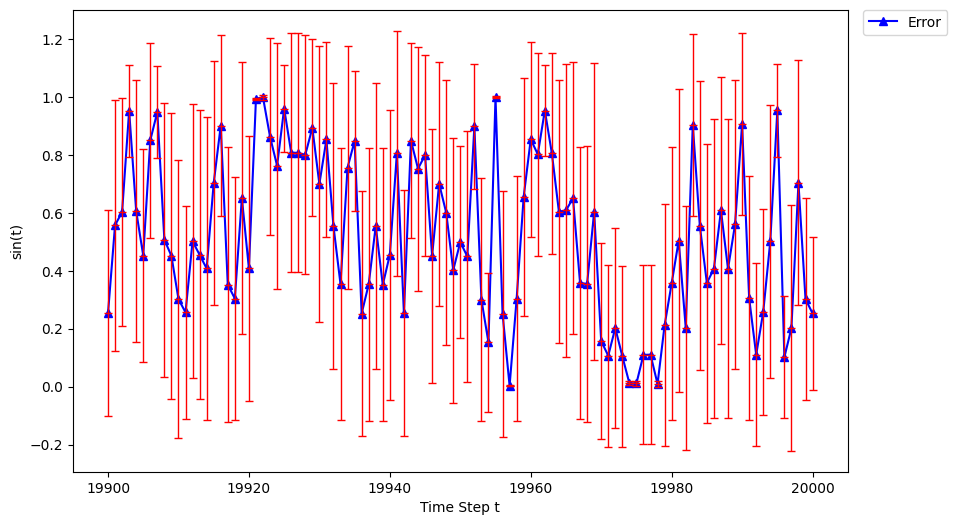

In [26]:
plot_prediction_absolute_error_by_mean_std(error_abs_value_proposed, sampling_interval=config.sampling_interval)

# Summary

In [27]:
predicted_values_list = []
error_abs_value_list = []

predicted_values_list.append(predicted_values)
predicted_values_list.append(predicted_values_proposed)

error_abs_value_list.append(error_abs_value)
error_abs_value_list.append(error_abs_value_proposed)

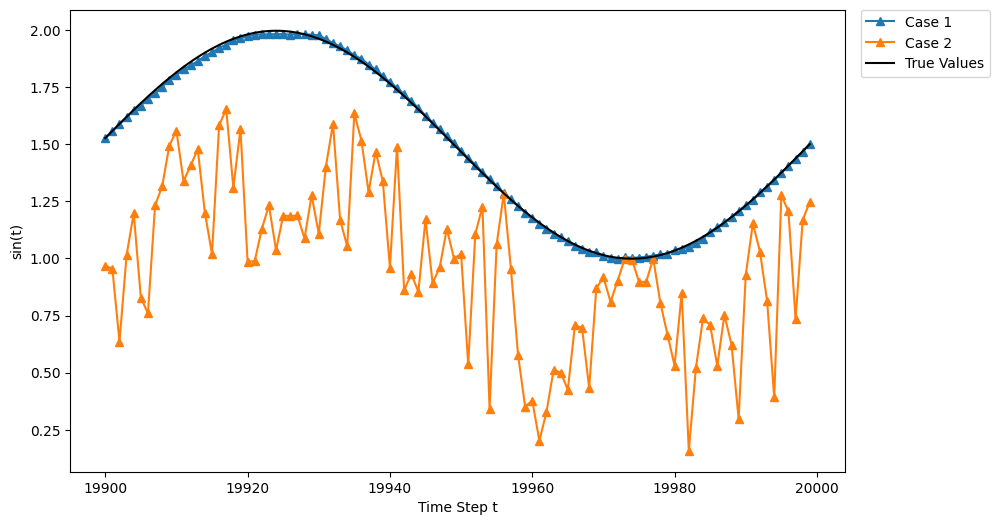

In [28]:
plot_syntheic_load_list_by_mean_std(true_values, predicted_values_list, sampling_interval=config.sampling_interval)

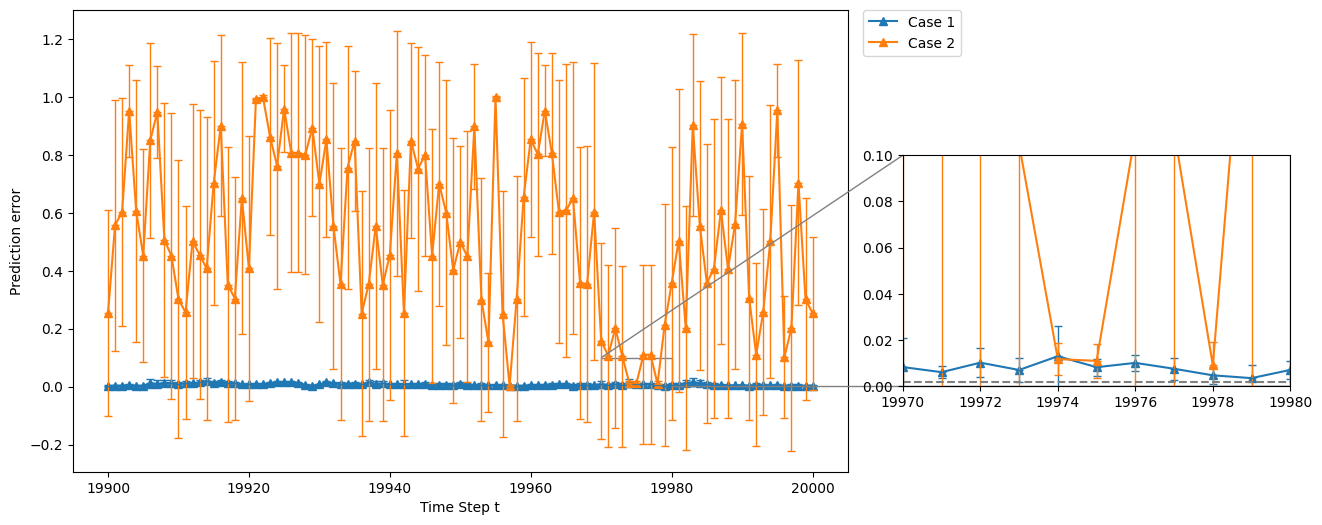

In [29]:
# zoom_coords = ((zoom_xmin, zoom_xmax), (zoom_ymin, zoom_ymax))
plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list, sampling_interval=config.sampling_interval, zoom_coords=config.zoom_coords)